# Análise exploratória dos dados 
## Identificar características individuais que representam o perfil dos leitores de jornal regulares.

In [1]:
#Importação de bibliotecas 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

/Users/naylla/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Importação de dados

In [2]:
#Carregando o  dataset
data = pd.read_csv('journalreaders_data.csv')

In [3]:
#Primeiras linhas do dataframe
data.head(10)

,Unnamed: 0,ID,ID_ORIGINAL,Gender,Portuguese_Citizenship,Age,Frequent_Traveler,Cellphone_Usage,Household_Size,JournalReader,Satisfaction_Level,Occupation,Political_Participation,Social_Person,Area_Residence,Household_Income
0,0,1000,467329,Female,No,40,Yes,Low,1.0,1,4.0,Government,Strong involvement,No,City,7000
1,1,1001,461212,Female,No,30,No,High,6.0,0,1.0,Nothing,Strong involvement,No,City,19610
2,2,1002,466216,Male,No,29,No,High,4.0,0,1.0,Private company,No involvement,Yes,Country-side,8261
3,3,1003,462613,Female,Yes,35,No,Low,5.0,0,1.0,Private company,Strong involvement,Yes,Country-side,7000
4,4,1004,465709,Male,Yes,68,Yes,Average,2.0,1,4.0,Private company,No involvement,No,City,8261
5,5,1005,466716,Female,Yes,79,Yes,Low,1.0,1,8.0,Self-employed,Strong involvement,No,City,8261
6,6,1006,466512,Female,No,22,No,High,2.0,0,2.0,Private company,Some involvement,No,City,8261
7,7,1007,466144,Female,Yes,48,No,Low,NaN,1,NaN,Private company,Unknown,NaN,NaN,7000
8,8,1008,466799,Female,No,19,No,High,3.0,0,1.0,Private company,Some involvement,No,City,9522
9,9,1009,465043,Male,Yes,48,Yes,Average,5.0,1,1.0,Government,Strong involvement,No,City,18349


In [4]:
#Observar os numeros de linhas e colunas
data.shape

(8000, 16)

In [5]:
# Tipos dos dados
data.dtypes

Unnamed: 0                   int64
ID                           int64
ID_ORIGINAL                  int64
Gender                      object
Portuguese_Citizenship      object
Age                          int64
Frequent_Traveler           object
Cellphone_Usage             object
Household_Size             float64
JournalReader                int64
Satisfaction_Level         float64
Occupation                  object
Political_Participation     object
Social_Person               object
Area_Residence              object
Household_Income             int64
dtype: object

In [6]:
#Obter mais informaçoes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               8000 non-null   int64  
 1   ID                       8000 non-null   int64  
 2   ID_ORIGINAL              8000 non-null   int64  
 3   Gender                   8000 non-null   object 
 4   Portuguese_Citizenship   7862 non-null   object 
 5   Age                      8000 non-null   int64  
 6   Frequent_Traveler        7923 non-null   object 
 7   Cellphone_Usage          8000 non-null   object 
 8   Household_Size           7670 non-null   float64
 9   JournalReader            8000 non-null   int64  
 10  Satisfaction_Level       7670 non-null   float64
 11  Occupation               7876 non-null   object 
 12  Political_Participation  7876 non-null   object 
 13  Social_Person            7924 non-null   object 
 14  Area_Residence          

In [7]:
#Observar se existe algum tipo de Outlier e analisar variaveis estatísticas
data.describe()

,Unnamed: 0,ID,ID_ORIGINAL,Age,Household_Size,JournalReader,Satisfaction_Level,Household_Income
count,8000.00000,8000.00000,8000.000000,8000.000000,7670.000000,8000.000000,7670.000000,8000.000000
mean,3999.50000,4999.50000,463456.462250,43.576625,2.844329,0.477625,2.641851,9985.575125
std,2309.54541,2309.54541,2585.043875,16.704319,1.527431,0.499530,1.711686,4190.830154
min,0.00000,1000.00000,458982.000000,18.000000,1.000000,0.000000,1.000000,7000.000000
25%,1999.75000,2999.75000,461226.750000,31.000000,2.000000,0.000000,1.000000,7000.000000
50%,3999.50000,4999.50000,463448.500000,41.000000,3.000000,0.000000,2.000000,8261.000000
75%,5999.25000,6999.25000,465716.250000,53.000000,4.000000,1.000000,4.000000,12044.000000
max,7999.00000,8999.00000,467974.000000,89.000000,9.000000,1.000000,9.000000,24654.000000


# Limpeza dos dados 

In [8]:
#Checar os dados vazios (NULL)
data_cleaned = data.copy()
data_cleaned.isnull().sum()

Unnamed: 0                   0
ID                           0
ID_ORIGINAL                  0
Gender                       0
Portuguese_Citizenship     138
Age                          0
Frequent_Traveler           77
Cellphone_Usage              0
Household_Size             330
JournalReader                0
Satisfaction_Level         330
Occupation                 124
Political_Participation    124
Social_Person               76
Area_Residence              76
Household_Income             0
dtype: int64

In [17]:
#Deletar as linhas das colunas que estão vazias, elas também poderiam ser limpas colocando a média, mediana ou 
#moda dos valores da coluna
data_cleaned.dropna(subset=['Portuguese_Citizenship', 'Frequent_Traveler', 'Household_Size', 'Satisfaction_Level', 'Occupation', 'Political_Participation', 'Social_Person', 'Area_Residence'], inplace=True)

In [18]:
data_cleaned.isnull().sum()

Unnamed: 0                 0
ID                         0
ID_ORIGINAL                0
Gender                     0
Portuguese_Citizenship     0
Age                        0
Frequent_Traveler          0
Cellphone_Usage            0
Household_Size             0
JournalReader              0
Satisfaction_Level         0
Occupation                 0
Political_Participation    0
Social_Person              0
Area_Residence             0
Household_Income           0
dtype: int64

## Análise de dados

### Idade

In [43]:
#Fazer a relação da idade com os leitores de jornal
Leitor_idade = data_cleaned.groupby(['Age', 'JournalReader']).size().unstack(fill_value=0)
Leitor_idade

JournalReader,0,1
Age,,
18,110,6
19,109,6
20,95,11
21,91,11
22,109,7
...,...,...
85,16,3
86,12,14
87,15,13


Text(0.5, 1.0, 'Age')

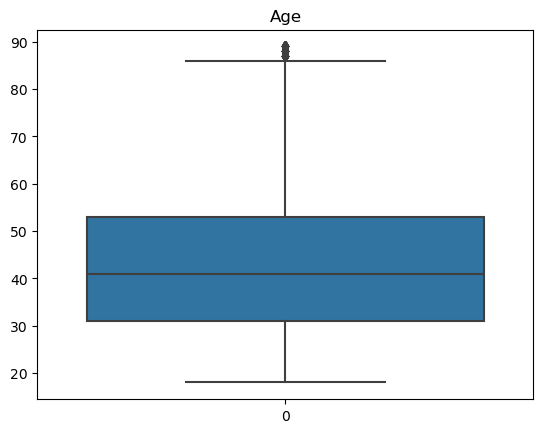

In [60]:
#Visualização em Boxplot para observar outliers, nesse caso existe mas não são erros, eles fazem parte da análise dos dados
sns.boxplot(data_cleaned["Age"]).set_title("Age")

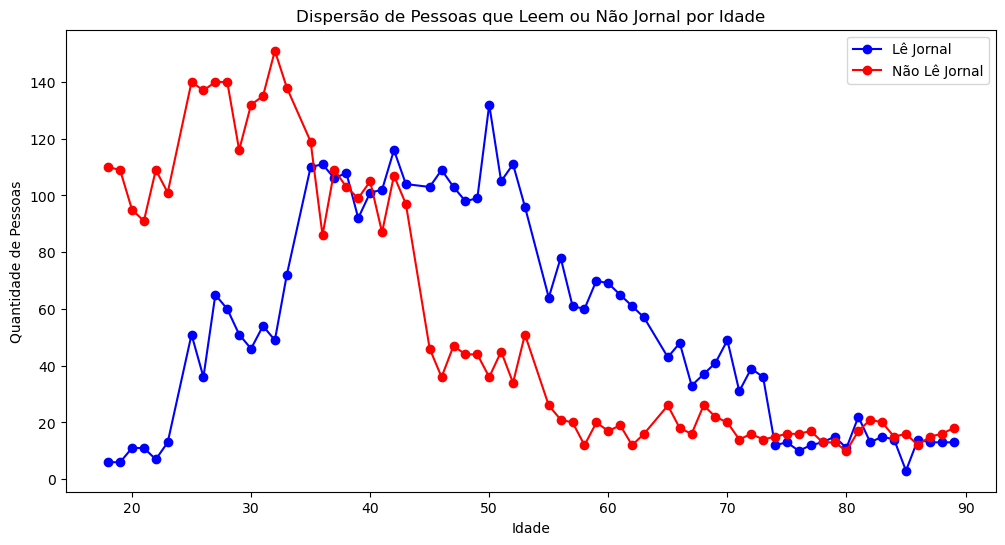

In [46]:
#Visualizar com gráfico de dispersão qual a faixa etária dos leitores de jornal
plt.figure(figsize=(12, 6))

plt.plot(Leitor_idade.index, Leitor_idade[1], marker='o', linestyle='-', color='b', label='Lê Jornal')
plt.plot(Leitor_idade.index, Leitor_idade[0], marker='o', linestyle='-', color='r', label='Não Lê Jornal')

plt.title('Dispersão de Pessoas que Leem ou Não Jornal por Idade')
plt.xlabel('Idade')
plt.ylabel('Quantidade de Pessoas')
plt.legend()

plt.show()

### Gênero

In [92]:
#Observar qual é o gênero que mais lê o jornal
Leitor_genero = data_cleaned.groupby(['JournalReader', 'Gender']).size().unstack(fill_value=0)
Leitor_genero

Gender,Female,Male
JournalReader,,
0,1606,2118
1,1655,1937


In [93]:
#Fazer em percentual para ficar melhor a visualização 
genero_percentual = Leitor_genero.div(Leitor_genero.sum(axis=1), axis=0) * 100

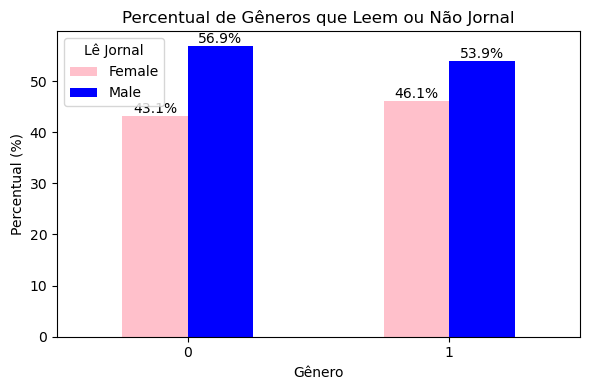

In [103]:
#Visualização em gráfico de barras
plt.figure(figsize=(6, 4))

ax = genero_percentual.plot(kind='bar', stacked=False, color=['pink', 'blue'], ax=plt.gca())

for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}%', (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom')
    
plt.title('Percentual de Gêneros que Leem ou Não Jornal')
plt.xlabel('Gênero')
plt.ylabel('Percentual (%)')
plt.xticks(rotation=0)
plt.legend(title='Lê Jornal')

# Exibir o gráfico
plt.tight_layout()
plt.show()

Sera que a cidadania portuguesa influencia na leitura do jornal?

### Português Cidadão 

In [53]:
#Observar a relação da cidadania portuguesa com os leitores de jornal 
Leitor_portugues = data_cleaned.groupby(['Portuguese_Citizenship', 'JournalReader']).size().unstack(fill_value=0)
Leitor_portugues

JournalReader,0,1
Portuguese_Citizenship,,
No,2132,824
Yes,1592,2768


In [55]:
agrupado = data_cleaned.groupby(['Portuguese_Citizenship']).size()
agrupado

Portuguese_Citizenship
No     2956
Yes    4360
dtype: int64

In [57]:
#Transformar em percentual para melhor visualização
portugues_percentual = Leitor_portugues.div(Leitor_portugues.sum(axis=1), axis=0) * 100

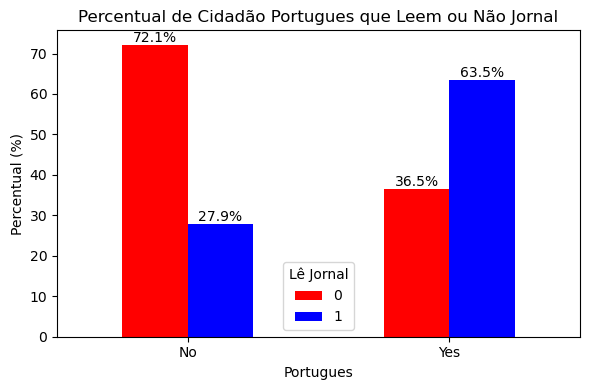

In [59]:
#Visualização em gráfico de barras
plt.figure(figsize=(6, 4))

ax = portugues_percentual.plot(kind='bar', stacked=False, color=['r', 'b'], ax=plt.gca())

for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}%', (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom')
    
plt.title('Percentual de Cidadão Portugues que Leem ou Não Jornal')
plt.xlabel('Portugues')
plt.ylabel('Percentual (%)')
plt.xticks(rotation=0)
plt.legend(title='Lê Jornal')

# Exibir o gráfico
plt.tight_layout()
plt.show()

Relação do uso de celular com a leitura de jornal

### Uso de Celular

In [61]:
#Observar as categorias de uso de celular e a quantidade de pessoas em cada uma
agrupado = data_cleaned.groupby(['Cellphone_Usage']).size()
agrupado

Cellphone_Usage
Average    1787
High       3683
Low        1846
dtype: int64

In [62]:
#Relacionar a categoria do uso de celular com os leitores de jornal 
Leitor_uso_celular = data_cleaned.groupby(['Cellphone_Usage', 'JournalReader']).size().unstack(fill_value=0)
Leitor_uso_celular

JournalReader,0,1
Cellphone_Usage,,
Average,372,1415
High,2926,757
Low,426,1420


In [63]:
#Fazer o percentual para melhor visualização
uso_celular_percentual = Leitor_uso_celular.div(Leitor_uso_celular.sum(axis=1), axis=0) * 100

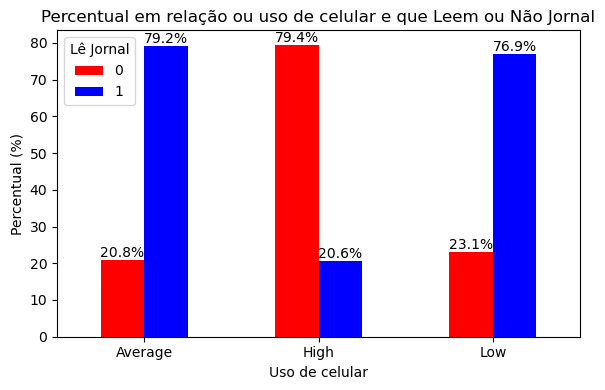

In [64]:
#Visualização em gráfico de barras
plt.figure(figsize=(6, 4))

ax = uso_celular_percentual.plot(kind='bar', stacked=False, color=['r', 'b'], ax=plt.gca())

for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}%', (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom')
    
plt.title('Percentual em relação ou uso de celular e que Leem ou Não Jornal')
plt.xlabel('Uso de celular')
plt.ylabel('Percentual (%)')
plt.xticks(rotation=0)
plt.legend(title='Lê Jornal')

# Exibir o gráfico
plt.tight_layout()
plt.show()

Fazer uma análise em relação a renda familiar

### Renda do Domicílio

Text(0.5, 1.0, 'Household_Income')

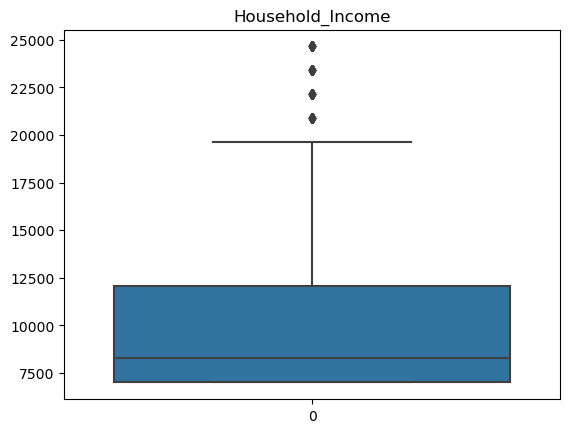

In [66]:
#Já vimos análise estatística e agora vamos ver com boxplot o nível de outlier e a média/mediana dos valores
sns.boxplot(data_cleaned["Household_Income"]).set_title("Household_Income")

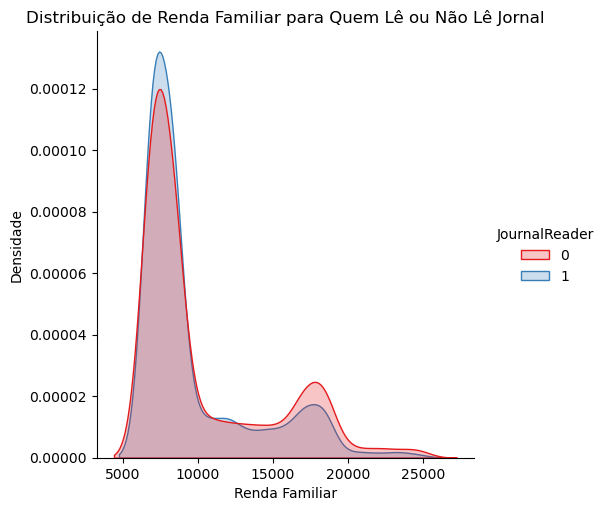

In [67]:
# Criar o gráfico de densidade com seaborn
sns.displot(data=data_cleaned, x='Household_Income', hue='JournalReader', kind='kde', fill=True, palette='Set1')

# Configurações do gráfico
plt.title('Distribuição de Renda Familiar para Quem Lê ou Não Lê Jornal')
plt.xlabel('Renda Familiar')
plt.ylabel('Densidade')

# Exibir o gráfico
plt.show()

In [74]:
#Não temos muita relação de renda familiar com os leitores, vamos ver melhor com gráfico de dispersão
#Porem temos grande quantidade de pessoas com renda abaixo de 10000

In [70]:
#Fazer a relação da renda com leitores de jornal 
Leitor_renda = data_cleaned.groupby(['Household_Income', 'JournalReader']).size().unstack(fill_value=0)
Leitor_renda

JournalReader,0,1
Household_Income,,
7000,1404,1417
8261,1034,1136
9522,128,130
10783,118,114
12044,106,127
13305,101,78
14566,98,87
15827,94,89
17088,227,162


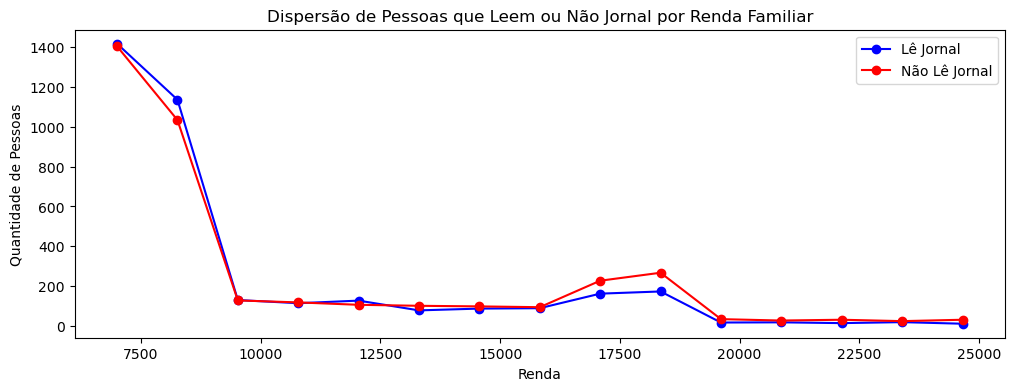

In [76]:
#Visualização em gráfico 
plt.figure(figsize=(12, 4))

plt.plot(Leitor_renda.index, Leitor_renda[1], marker='o', linestyle='-', color='b', label='Lê Jornal')
plt.plot(Leitor_renda.index, Leitor_renda[0], marker='o', linestyle='-', color='r', label='Não Lê Jornal')

plt.title('Dispersão de Pessoas que Leem ou Não Jornal por Renda Familiar')
plt.xlabel('Renda')
plt.ylabel('Quantidade de Pessoas')
plt.legend()

plt.show()

Análise das pessoas que possuem ou não algum tipo de envolvimento com politica, são leitoras de jornal?

### Participação na Política

In [79]:
#Começar a análise agrupando os dois valores
Leitor_politica = data_cleaned.groupby(['Political_Participation', 'JournalReader']).size().unstack(fill_value=0)
Leitor_politica

JournalReader,0,1
Political_Participation,,
No involvement,527,347
Some involvement,959,226
Strong involvement,1600,1282
Unknown,638,1737


In [80]:
#Transformar em percentual para melhor vizualização 
politica_percentual = Leitor_politica.div(Leitor_politica.sum(axis=1), axis=0) * 100

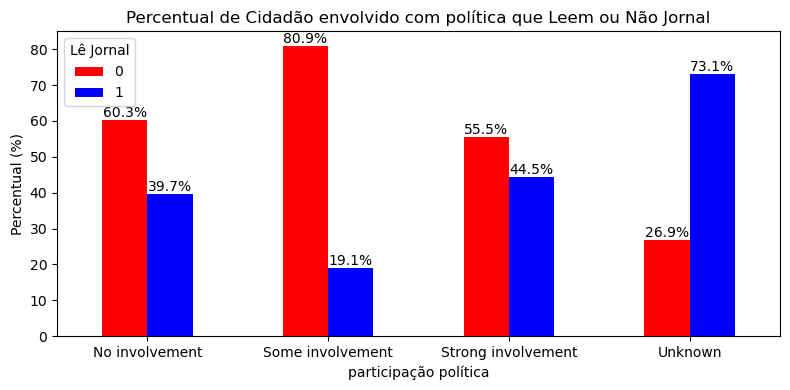

In [82]:
#Visualização em gráfico de barras
plt.figure(figsize=(8, 4))

ax = politica_percentual.plot(kind='bar', stacked=False, color=['r', 'b'], ax=plt.gca())

for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}%', (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom')
    
plt.title('Percentual de Cidadão envolvido com política que Leem ou Não Jornal')
plt.xlabel('participação política')
plt.ylabel('Percentual (%)')
plt.xticks(rotation=0)
plt.legend(title='Lê Jornal')

# Exibir o gráfico
plt.tight_layout()
plt.show()

In [91]:
#Valores de quantos leitores e não leitores de Jornal temos em nossa pesquisa
agrupado = data_cleaned.groupby(['JournalReader']).size()
agrupado 

JournalReader
0    3724
1    3592
dtype: int64

Essas foram algumas das principais caractéristicas que conseguimos relacionar com os leitores de jornal